# Support Vector Regression (SVR)

# Importing the libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [26]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [27]:
display(dataset)


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [28]:
y=y.reshape(len(y),1)
display(y)

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

# Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_Y=StandardScaler()

X=sc_X.fit_transform(X)
y=sc_Y.fit_transform(y)

In [30]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [31]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

# Training the SVR model on the whole dataset

In [32]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X,y)



C:\Python310\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Predicting a new result

In [33]:
regressor.predict(sc_X.transform([[6.5]]))
                  #as we have scaled the values so we need to use the same scale for predicting values

array([-0.27861589])

In [42]:
p=sc_Y.inverse_transform([regressor.predict(sc_X.transform(y))])

# Visualising the SVR results

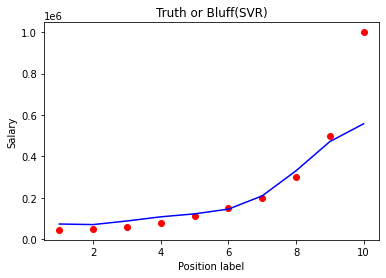

In [52]:
p=sc_Y.inverse_transform([regressor.predict((X))])
plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(y),color='red')
plt.plot(sc_X.inverse_transform(X),p.T,color='blue')
plt.title('Truth or Bluff(SVR)')
plt.xlabel('Position label')
plt.ylabel('Salary')
plt.show()

 # Visualising the SVR results


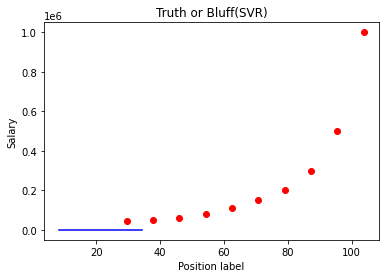

In [57]:
X=sc_X.inverse_transform(X)
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(y),color='red')
plt.plot(X_grid,regressor.predict(sc_X.transform(X_grid)),color='blue')
plt.title('Truth or Bluff(SVR)')
plt.xlabel('Position label')
plt.ylabel('Salary')
plt.show()